<a href="https://colab.research.google.com/github/nadinne94/projeto_estastitica_freq_medidas/blob/main/Probabilida_desfio_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy as stats

In [2]:
df = pd.read_csv('populacao_brasileira.csv')

In [3]:
df

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M
...,...,...,...,...,...,...,...
995,995,AC,22,Médio,Básico,2852.40,F
996,996,PE,40,Fundamental,Básico,2533.96,M
997,997,GO,27,Pós-graduação,Intermediário,1405.30,F
998,998,RS,61,Fundamental,Avançado,3513.60,F


In [4]:
# dar nome a colune unnamed
df.rename(columns = {'Unnamed: 0': 'id'}, inplace=True)

In [5]:
df

,id,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M
...,...,...,...,...,...,...,...
995,995,AC,22,Médio,Básico,2852.40,F
996,996,PE,40,Fundamental,Básico,2533.96,M
997,997,GO,27,Pós-graduação,Intermediário,1405.30,F
998,998,RS,61,Fundamental,Avançado,3513.60,F


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [ ]:
df.duplicated().sum()

0

## Análise

###1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quemtemonível avançado.

In [ ]:
df['nível de proficiência em inglês'].value_counts()

Avançado         344
Intermediário    329
Básico           327
Name: nível de proficiência em inglês, dtype: int64

In [ ]:
# selecionando apenas as pessoas fluentes em inglês
df_ingles_fluente = df[df['nível de proficiência em inglês'] == 'Avançado']
df_ingles_fluente

,id,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
4,4,SE,25,Fundamental,Avançado,3529.80,M
5,5,AM,38,Fundamental,Avançado,4441.57,F
7,7,DF,36,Superior,Avançado,2203.10,F
9,9,AP,28,Superior,Avançado,2796.95,M
18,18,MS,41,Pós-graduação,Avançado,2512.39,F
...,...,...,...,...,...,...,...
989,989,RR,30,Médio,Avançado,4543.24,M
991,991,RO,20,Superior,Avançado,1880.38,F
993,993,RS,23,Superior,Avançado,1231.56,M
994,994,DF,27,Pós-graduação,Avançado,3323.17,F


A probabilidade do escolhido falar inglês fluente, temos então:
  
  - P(a) = o total de fluentes em inglês/ total de pessoas

A probabilidade complementar será: 1 - P(a)

In [ ]:
probabilidade_complementar = 1 - (len(df_ingles_fluente)/len(df))
probabilidade_complementar

0.656

###2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
#seleção dos paraenses e alagoenses
df_alagoas_para = df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]
df_alagoas_para

,id,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
17,17,PA,19,Médio,Básico,2588.12,M
32,32,PA,33,Superior,Intermediário,3018.42,F
74,74,PA,48,Fundamental,Intermediário,3279.97,M
106,106,AL,52,Superior,Básico,2754.26,F
114,114,AL,26,Fundamental,Intermediário,2731.11,F
...,...,...,...,...,...,...,...
972,972,AL,22,Pós-graduação,Avançado,1858.31,M
976,976,AL,36,Médio,Avançado,2917.32,F
977,977,AL,37,Fundamental,Intermediário,2878.25,F
982,982,AL,18,Superior,Intermediário,4221.03,F


In [ ]:
#probabilidade de ser do alagoas ou do para
df_prob_pa_al = len(df_alagoas_para)/len(df)
df_prob_pa_al

0.079

In [ ]:
#considerando apenas as pessoas que moram no AL ou PA, selecionando as que recebem >= 5mil
df_renda_5mil = df_alagoas_para[df_alagoas_para['renda'] >= 5000]
df_renda_5mil

,id,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
116,116,PA,29,Fundamental,Intermediário,5573.36,F
371,371,PA,57,Fundamental,Intermediário,5163.25,M
619,619,AL,62,Fundamental,Básico,5252.44,M
691,691,AL,53,Superior,Intermediário,5210.52,F


In [ ]:
len(df_renda_5mil)/df_prob_pa_al

50.63291139240506

###3.

#### Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas.

In [ ]:
# seleção estado Amazonas
df_amaz = df[df['estado'] == 'AM']

In [ ]:
df_amaz['escolaridade'].value_counts()

Pós-graduação    12
Fundamental      10
Superior          9
Médio             7
Name: escolaridade, dtype: int64

In [ ]:
# superior completo na amazonia (inclui a pos)
df_sup_comp_am = df_amaz[(df_amaz['escolaridade'] == 'Superior') | (df_amaz['escolaridade'] == 'Pós-graduação')]

In [ ]:
prob_sup_comp_am = len(df_sup_comp_am)/len(df_amaz)
prob_sup_comp_am

0.5526315789473685

#### Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
# probabilidade do amazonense não ter superior
prob_amaz_sem_sup = 1 - prob_sup_comp_am
prob_amaz_sem_sup

0.4473684210526315

In [ ]:
(prob_amaz_sem_sup**4) * prob_sup_comp_am

0.022135890467222828

###4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

#### Faixa de 103.74 a 5632.38

In [ ]:
# @title
# renda max e min
df_renda_min = df['renda'].min()
df_renda_max = df['renda'].max()

print(df_renda_min)
print(df_renda_max)

103.74
5632.38


In [ ]:
# @title
# como a faixa de 1500, o menor valor será 1500
bin_size = 1500

n_bins = round((df_renda_max - df_renda_min)/bin_size)
n_bins

4

In [ ]:
# @title
# Criando os limites das faixas de valores
bin_edges = [df_renda_min + i * bin_size for i in range(n_bins)]
bin_edges

[103.74, 1603.74, 3103.74, 4603.74]

In [ ]:
# @title
# definindo o limite superior da faixa como o maior valor de renda
bin_edges.append(df_renda_max)
bin_edges

[103.74, 1603.74, 3103.74, 4603.74, 5632.38]

In [ ]:
# @title
# agrupando pessoas por faixa de renda
df['bin'] = pd.cut(df['renda'], bins=bin_edges, include_lowest=True)
bin_counts = df['bin'].value_counts().sort_index()
bin_counts

(103.73899999999999, 1603.74]     70
(1603.74, 3103.74]               437
(3103.74, 4603.74]               423
(4603.74, 5632.38]                70
Name: bin, dtype: int64

In [ ]:
# @title
# histograma
hist, bins = np.histogram(df['renda'], bins=1500)

In [ ]:
# @title
#densidade
densidade = hist/(df['renda'].size * np.diff(bins))

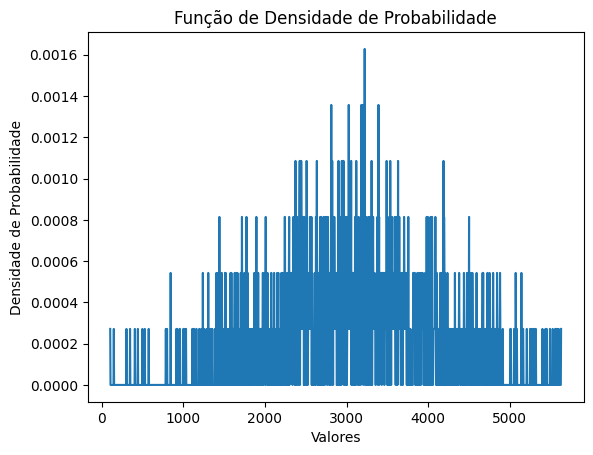

In [ ]:
# @title
#plot
plt.plot(bins[:-1], densidade)
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.title('Função de Densidade de Probabilidade')
plt.show()

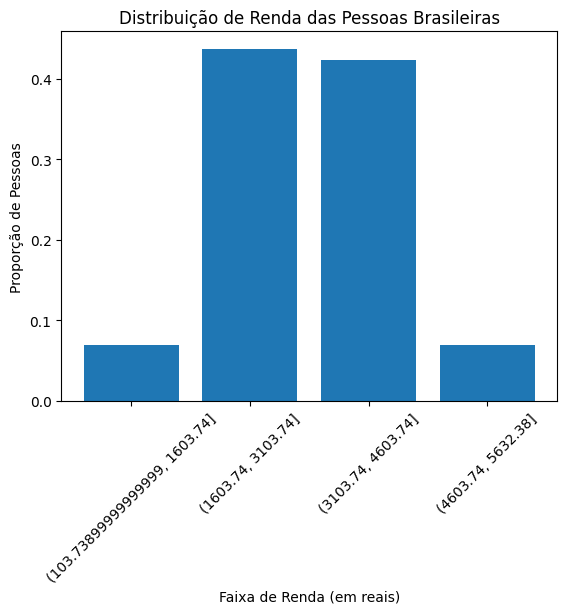

Proporção de pessoas em cada faixa de renda:
(103.73899999999999, 1603.74]    0.070
(1603.74, 3103.74]               0.437
(3103.74, 4603.74]               0.423
(4603.74, 5632.38]               0.070
Name: bin, dtype: float64


In [ ]:
# @title
# Calculando a proporção de pessoas em cada faixa
proporcao_por_faixa = bin_counts / len(df)

# Plotando o histograma da renda
plt.bar(bin_counts.index.astype(str), proporcao_por_faixa)
plt.xlabel('Faixa de Renda (em reais)')
plt.ylabel('Proporção de Pessoas')
plt.title('Distribuição de Renda das Pessoas Brasileiras')
plt.xticks(rotation=45)
plt.show()

print("Proporção de pessoas em cada faixa de renda:")
print(proporcao_por_faixa)

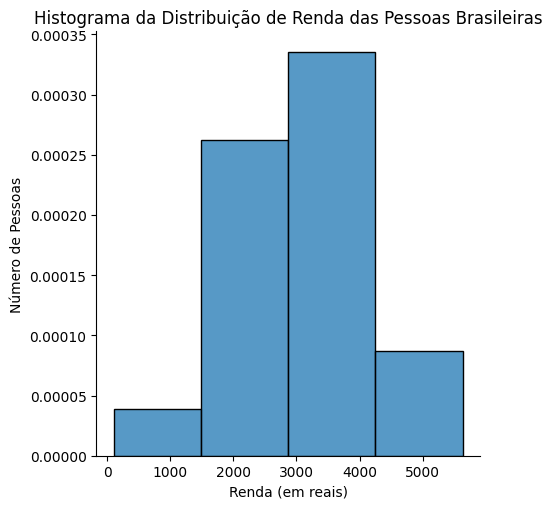

In [ ]:
# @title
# Criando o displot
sns.displot(data=df, x='renda', bins=n_bins, kde=False, stat='density', edgecolor='black')

# Personalizando o gráfico
plt.xlabel('Renda (em reais)')
plt.ylabel('Número de Pessoas')
plt.title('Histograma da Distribuição de Renda das Pessoas Brasileiras')

# Exibindo o gráfico
plt.show()

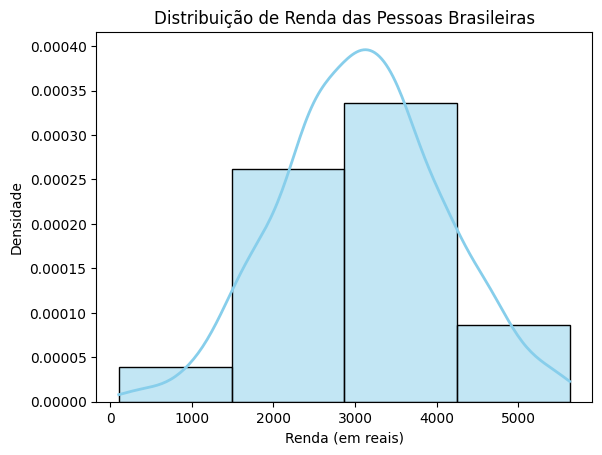

In [ ]:
# @title
# Plotando o histograma de linha usando seaborn.histplot
sns.histplot(data=df, x='renda', bins=n_bins, kde=True, stat='density', color='skyblue', line_kws={'linewidth': 2})

# Personalizando o gráfico
plt.xlabel('Renda (em reais)')
plt.ylabel('Densidade')
plt.title('Distribuição de Renda das Pessoas Brasileiras')

# Exibindo o gráfico
plt.show()

#### Faixa de 0 a 6000

In [ ]:
bin = 1500

n_bins = round((df['renda'].max() - df['renda'].min())/bin)
n_bins

4

In [ ]:
faixa_renda = pd.cut(df['renda'], bins=range(0, (n_bins*bin+1), bin), right=False)
#print(faixa_renda)

contagem_por_faixa = faixa_renda.value_counts().sort_index()
print(contagem_por_faixa)

[0, 1500)        55
[1500, 3000)    414
[3000, 4500)    442
[4500, 6000)     89
Name: renda, dtype: int64


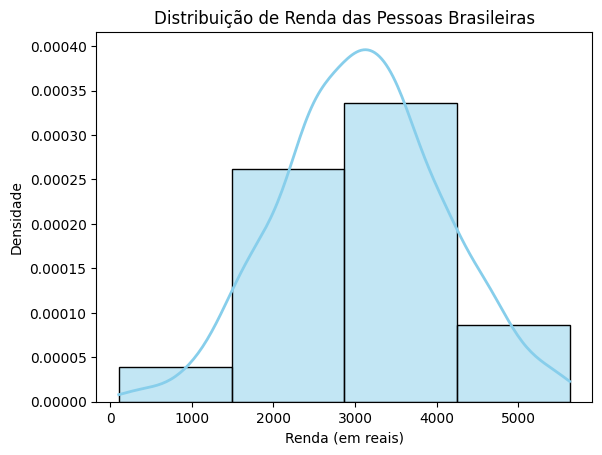

In [ ]:
# Plotando o histograma de linha usando seaborn.histplot
sns.histplot(data=df, x='renda', bins=n_bins, kde=True, stat='density', color='skyblue', line_kws={'linewidth': 2})

# Personalizando o gráfico
plt.xlabel('Renda (em reais)')
plt.ylabel('Densidade')
plt.title('Distribuição de Renda das Pessoas Brasileiras')

# Exibindo o gráfico
plt.show()

###5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

In [ ]:
# média
media = df['renda'].mean()
media

3082.5371800000003

In [ ]:
# variância
var = df['renda'].var()
var

993156.2281676152

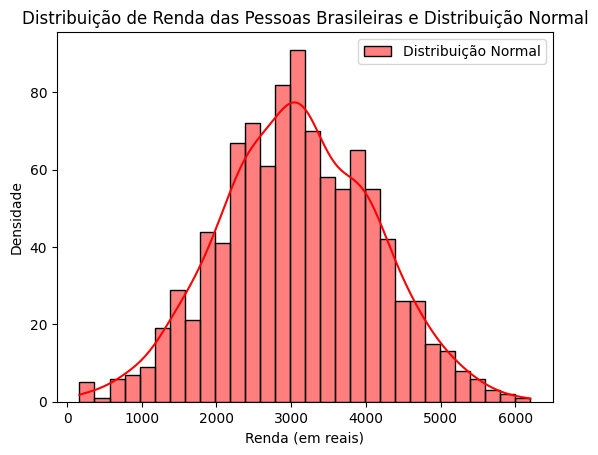

In [ ]:
normal = np.random.normal(loc=media, scale=df['renda'].std(), size=len(df['renda']))

# Plotando a distribuição normal gerada aleatoriamente
sns.histplot(normal, bins=30, kde=True, color='red', alpha=0.5, label='Distribuição Normal')

# Configurando o título e os rótulos dos eixos
plt.title('Distribuição de Renda das Pessoas Brasileiras e Distribuição Normal')
plt.xlabel('Renda (em reais)')
plt.ylabel('Densidade')
plt.legend()

# Exibindo o gráfico
plt.show()

###6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
pos = df[df['escolaridade'] == 'Pós-graduação']

In [ ]:
# probabilidade pós no conjunto
prob_pos = len(pos)/len(df)
prob_pos

0.253

In [ ]:
# probabilidade pós considerando a amostra de população brasileira com 1 milhão de habitantes

# tamanho da população
n = 1000000

# número de pessoas com pós-graduação desejadas na amostra
k = 243000

# probabilidade de encontrar uma pessoa com pós-graduação no conjunto
p = prob_pos

In [ ]:
from scipy.stats import binom

In [ ]:
prob_pop_pos = binom.pmf(k,n,p)
prob_pop_pos

1.1104854289794913e-119

###7. Somando as densidades nós temos a função de densidade acumulada Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [ ]:
df['escolaridade'].value_counts()

Fundamental      266
Pós-graduação    253
Superior         243
Médio            238
Name: escolaridade, dtype: int64

In [ ]:
nivel_escolar_dens = []
nivel_escolar = ['Fundamental', 'Médio', 'Superior', 'Pós-graduação']

for nivel in nivel_escolar:
    escolaridades = len(df[df['escolaridade'] == nivel])/len(df)
    nivel_escolar_dens.append(escolaridades)

print(nivel_escolar_dens)

[0.266, 0.238, 0.243, 0.253]


In [ ]:
funcao_dens = pd.Series(nivel_escolar_dens)
funcao_dens.cumsum()

0    0.266
1    0.504
2    0.747
3    1.000
dtype: float64

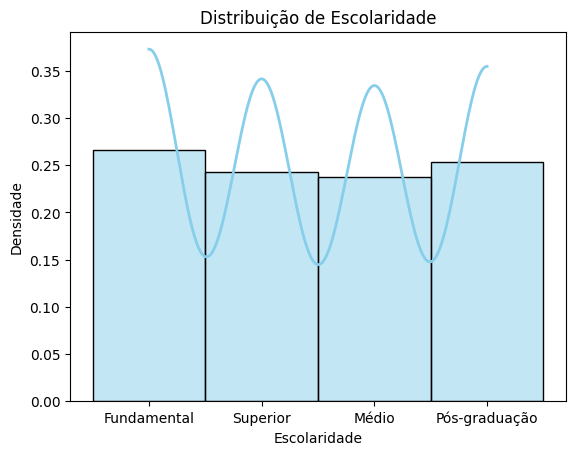

In [ ]:
# Plotando o histograma de linha usando seaborn.histplot
sns.histplot(data=df, x='escolaridade', bins=n_bins, kde=True, stat='density', color='skyblue', line_kws={'linewidth': 2})

# Personalizando o gráfico
plt.xlabel('Escolaridade')
plt.ylabel('Densidade')
plt.title('Distribuição de Escolaridade')

# Exibindo o gráfico
plt.show()

###8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

In [ ]:
df['nível de proficiência em inglês'].value_counts()

Avançado         344
Intermediário    329
Básico           327
Name: nível de proficiência em inglês, dtype: int64

In [ ]:
# pessoas do conjunto que tem ingles intermediario
ingles_interm = df[df['nível de proficiência em inglês'] == 'Intermediário']

#prob de ter inglês intermediario
prob_ingles_interm = len(ingles_interm)/len(df)
print(prob_ingles_interm)

#prob de não ter ingles intermediario
prob_compl_ing_int = 1 - prob_ingles_interm
print(prob_compl_ing_int)

0.329
0.671


In [ ]:
p = prob_ingles_interm
pc = prob_compl_ing_int

In [ ]:
# para confiança = 0,95 -> z = 1.96
me = 1.96 * np.sqrt((p * pc)/len(df))
me

0.029121603225097343

###9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [8]:
media = df['renda'].mean()
media

3082.5371800000003

In [9]:
corte = round(media + 1000, 2)
corte

4082.54

In [13]:
renda_sup_media = df[df['renda'] >= corte]

prob_renda_sup_media = 60/len(renda_sup_media)
prob_renda_sup_media

0.37267080745341613

###10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [16]:
sudeste = ['MG', 'RJ', 'SP', 'ES']

In [17]:
df_sudeste = df[df['estado'].isin(sudeste)]
df_sudeste

In [ ]:
df_sudeste_prob = df_sudeste[(df_sudeste['sexo'] == 'M') & (df_sudeste['escolaridade'] == 'Fundamental') & (df_sudeste['renda'] > 2000)]
df_sudeste_prob

In [20]:
len(df_sudeste_prob)/len(df)

0.019